In [69]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [70]:
df=pd.read_excel("D:/UB/archive/Data_Train.xlsx")

In [71]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [72]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [73]:
df = df.dropna()

In [74]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [76]:
df.describe(include='all')


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


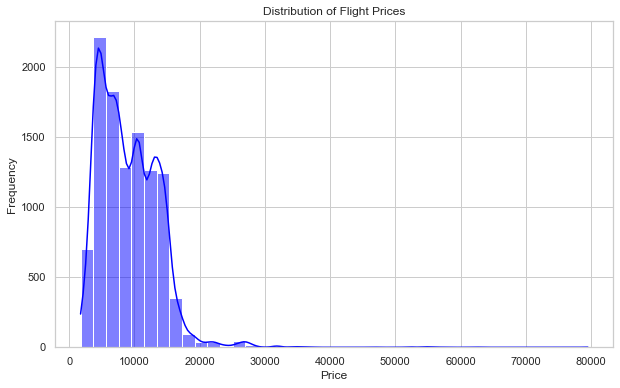

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Plotting the distribution of the 'Price' variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=40, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The histogram of flight prices shows that the majority of prices are clustered in the lower range, with a few expensive outliers. This right-skewed distribution suggests that while most flights are relatively affordable, there are some significantly more expensive options available

In [78]:
distinct_count = df['Airline'].nunique()
distinct_count

12

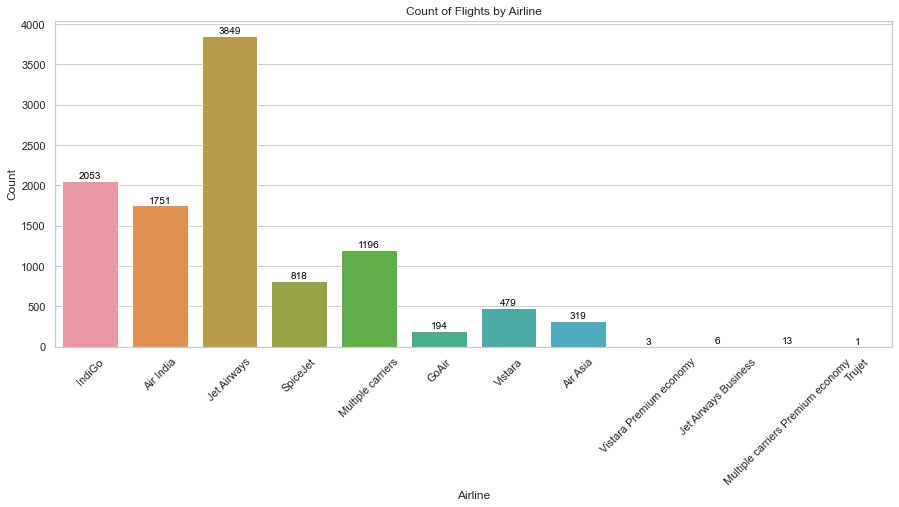

In [79]:
# Count plot for the 'Airline' variable
plt.figure(figsize=(15, 6))
ax=sns.countplot(df['Airline'])
plt.title('Count of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

The count plot reveals the distribution of flights among different airlines. Some airlines have a significantly higher number of flights compared to others.

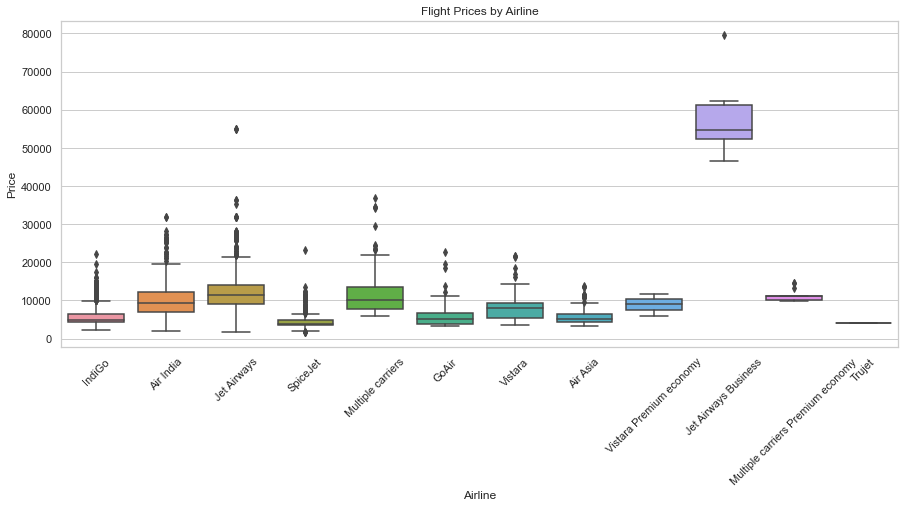

In [80]:
# Box plot to see how price varies with 'Airline'
plt.figure(figsize=(15, 6))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

The box plot displays the variation in flight prices across different airlines. It shows a range of median prices, with some airlines typically offering more expensive flights than others.

Additionally, the presence of outliers (indicated by points beyond the whiskers of the box plot) in several airlines suggests there are flights that are priced much higher than the typical range for those airlines.

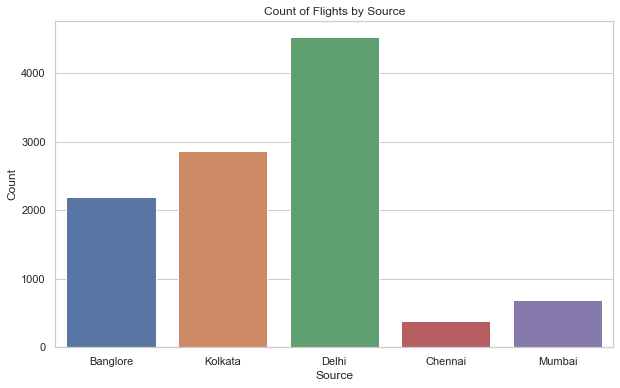

In [81]:
# Count plot for the 'Source' variable
plt.figure(figsize=(10, 6))
sns.countplot(df['Source'])
plt.title('Count of Flights by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

The count plot for the 'Source' variable illustrates the distribution of flights departing from different cities. Some sources have a higher flight count, indicating they are major departure hubs.

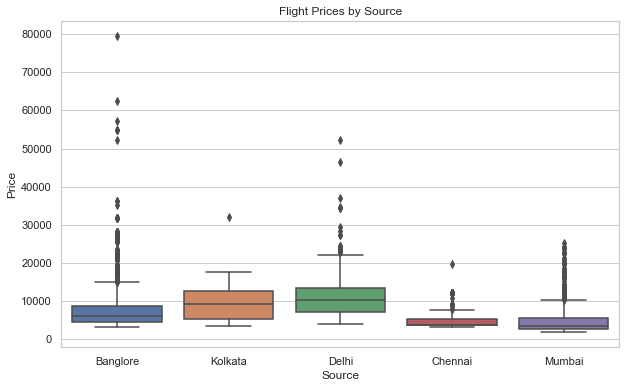

In [82]:
# Box plot to see how price varies with 'Source'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Flight Prices by Source')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

The box plot for flight prices based on the source city shows variations in median prices and ranges. Some source cities have a wider range of prices, including several outliers.

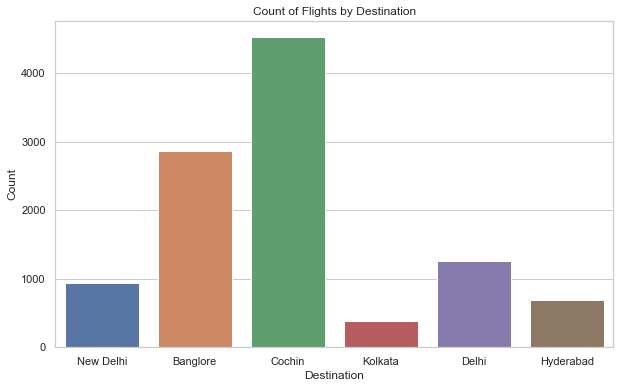

In [83]:
# Count plot for the 'Destination' variable
plt.figure(figsize=(10, 6))
sns.countplot(df['Destination'])
plt.title('Count of Flights by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

Similarly, the count plot for the 'Destination' variable highlights the distribution of flights arriving at different cities. Like with sources, certain destinations are more popular, as indicated by the higher count of flights.

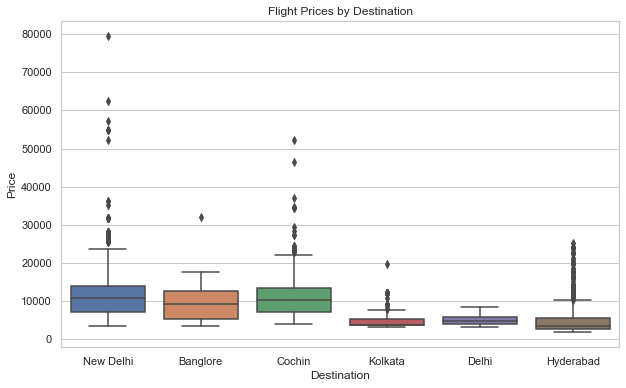

In [84]:
# Box plot to see how price varies with 'Destination'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Flight Prices by Destination')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

The box plot for flight prices based on destination cities also demonstrates varying price ranges and medians. Some destinations tend to have higher flight prices, possibly reflecting their popularity or distance.

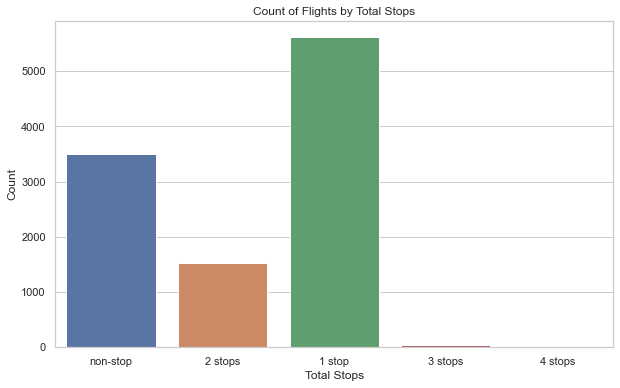

In [85]:
# Count plot for the 'Total_Stops' variable
plt.figure(figsize=(10, 6))
sns.countplot(df['Total_Stops'])
plt.title('Count of Flights by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.show()

The count plot for the 'Total_Stops' variable shows the frequency of flights with different numbers of stops. Flights with no stops (non-stop) and one stop are most common, while flights with more stops are less frequent.

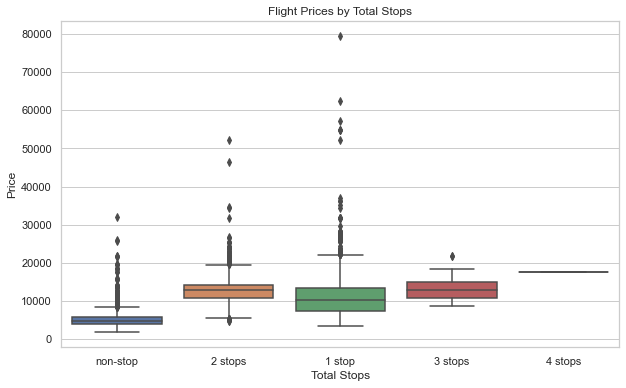

In [86]:
# Box plot to see how price varies with 'Total_Stops'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Prices by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

The box plot illustrates the relationship between the number of stops and flight prices. It reveals that non-stop flights tend to have a lower median price compared to flights with one or more stops. However, the range of prices widens with an increase in the number of stops, and flights with multiple stops can potentially be more expensive.

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [112]:
# Preprocessing as per the provided code
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month
df['Weekday_of_Journey'] = df['Date_of_Journey'].dt.weekday

def convert_duration(duration):
    hours, minutes = 0, 0
    duration = duration.split(' ')
    for time in duration:
        if 'h' in time:
            hours = int(time.replace('h',''))
        elif 'm' in time:
            minutes = int(time.replace('m',''))
    return hours * 60 + minutes

df['Duration_minutes'] = df['Duration'].apply(convert_duration)

In [113]:
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical = onehot_encoder.fit_transform(df[['Airline', 'Source', 'Destination', 'Total_Stops']])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=onehot_encoder.get_feature_names(['Airline', 'Source', 'Destination', 'Total_Stops']))
df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df, encoded_categorical_df], axis=1)
df_encoded.drop(['Airline', 'Source', 'Destination', 'Total_Stops', 'Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Additional_Info'], axis=1, inplace=True)

# Preparing the dataset for model training
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# Function to train and evaluate a model
def train_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [115]:
# Initialize models
linear_model = LinearRegression()
linear_mse, linear_r2 = train_evaluate(linear_model, X_train, X_test, y_train, y_test)
linear_mse, linear_r2

(8075037.000160013, 0.6254978245692007)

In [116]:
rf_model = RandomForestRegressor(random_state=42)
rf_mse, rf_r2 = train_evaluate(rf_model, X_train, X_test, y_train, y_test)
rf_mse, rf_r2

(4856007.545487539, 0.7747892189648886)

In [117]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_mse, gb_r2 = train_evaluate(gb_model, X_train, X_test, y_train, y_test)
gb_mse, gb_r2

(4759147.419085562, 0.7792813752298473)